In [1]:
# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np
# Import h5py module tor read HDF5 files
import h5py
# import moduels needed for the navigation in the file system
import os
import yaml


In [6]:
# Define a function to read the data from the HDF5 file
def read_data(filename, keys, index, collection= False, partitioned = False, partition_ind = 0):
    # Open the file
    if partitioned:
        ff = h5py.File(filename, 'r')
        partiotions = list(ff.keys())
        f = ff[partiotions[partition_ind]]
    else:
        f = h5py.File(filename, 'r')
    if collection:
        data = f[keys[0]]['y'][...]**2
        num_contibutions = len(keys)
        print('Number of contributions = ' + str(num_contibutions))
        for key in keys[1::]:
            data += f[key]['y'][...]**2
    else:
        key = keys[index]
        # Read the data
        print(f)
        data = f[key]['y'][...]**2
    # Close the file
    if partitioned:
        ff.close()
    else:
        title = f[key]['smiles_string'][...] 
        f.close()
    # Return the data
    title = np.char.decode(title, encoding='cp037')
    print(title)
    return data
# Define function that returns the keys of the HDF5 file
def get_keys(filename, partitioned = False, partition_ind = 0):
    # Open the file
    f = h5py.File(filename, 'r')
    # Get the keys
    keys = list(f.keys())
    # Print the number of keys
    print('Number of keys = ' + str(len(keys)))
    #print(keys)
    if partitioned:
        # List members of the partition
        keys = list(f[keys[partition_ind]].keys())
    # Close the file
    f.close()
    return keys
def draw_spectrum(data):
    # Read yaml file to read some parameters
    yaml_file = 'molnet_pre.yml'
    yaml_path = './config/' + yaml_file
    with open(yaml_path, 'r') as f:
        config = yaml.load(f, Loader=yaml.FullLoader)
    model = config['model']
    min_wavelength = model['min_wavelength']
    max_wavelength = model['max_wavelength']
    resolution = model['resolution']
    x = np.arange(min_wavelength, max_wavelength + resolution, resolution)
    # PLot the spectrum in data
    plt.plot(x, data)#/np.max(data))
    # compute center of mass of the data
    center_of_mass = np.sum(data*x)/np.sum(data)
    # Set the title to the sum of the integral of the data
    plt.title('Integral = ' + str(np.sum(data)) + ' Center of mass = ' + str(center_of_mass))
    plt.show()

Number of keys = 89985
<HDF5 file "data_train_small.hdf5" (mode r)>
C#CC


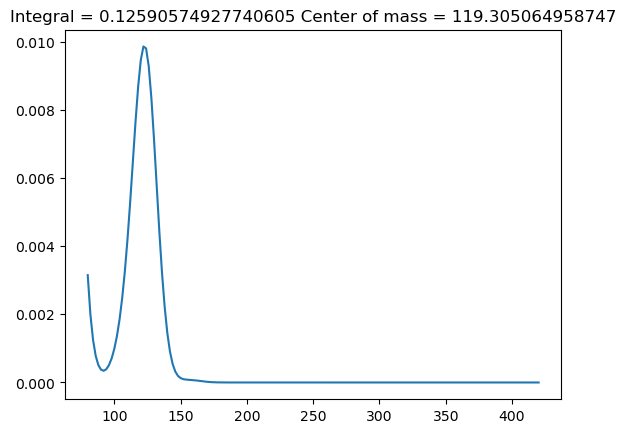

Number of keys = 89985
<HDF5 file "data_train_small.hdf5" (mode r)>
CC#N


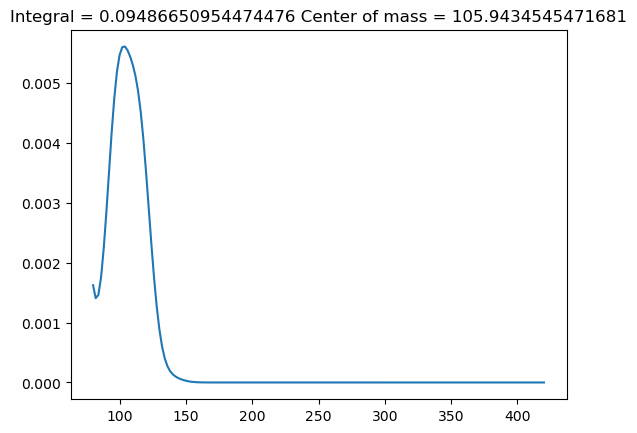

Number of keys = 89985
<HDF5 file "data_train_small.hdf5" (mode r)>
CC=O


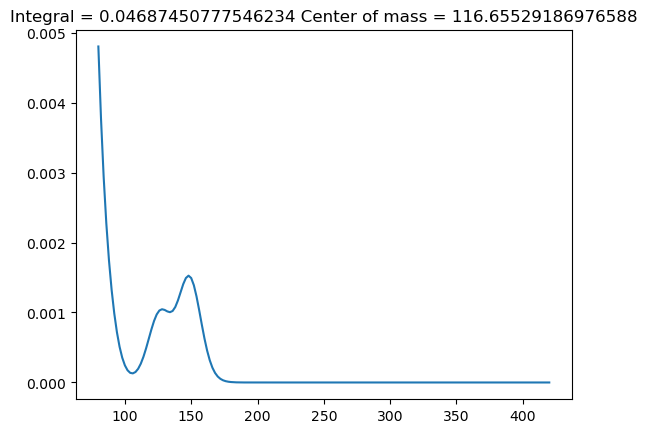

Number of keys = 89985
<HDF5 file "data_train_small.hdf5" (mode r)>
NC=O


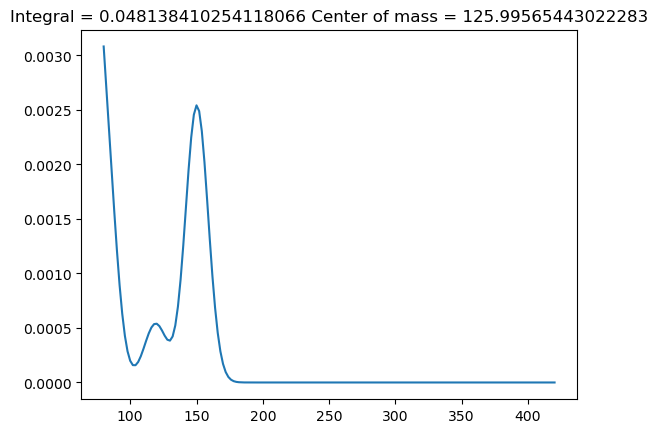

Number of keys = 89985
<HDF5 file "data_train_small.hdf5" (mode r)>
CCC


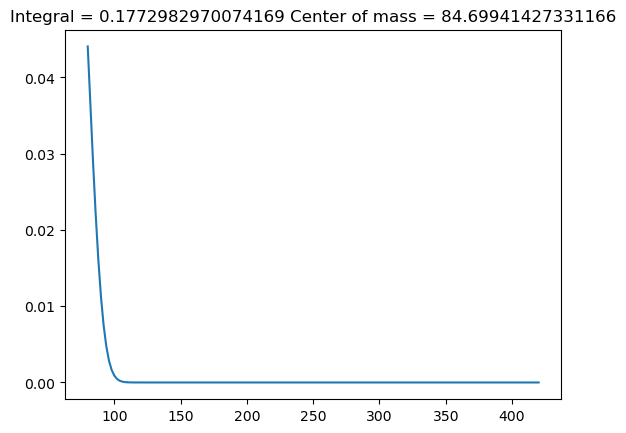

In [10]:
filename = './data/data_train_small.hdf5'
partition_ind = 9
partitioned = False
collection = False
import time
for i in range(5):
    if collection:
        partition_ind = i
    
    keys = get_keys(filename, partitioned = partitioned, partition_ind = partition_ind)
    data = read_data(filename, keys, i, collection = collection, partitioned = partitioned, partition_ind = partition_ind)
    draw_spectrum(data)
    if partitioned:
        breaks
    #time.sleep(1)